# Gradient Decent on 3D
In the last notebook, we saw how gradient decent was able to find local optimum for a given function. The function in the previous notebook was a function of single variable. Their only x was the independent variable and y was dependent on x.

In the practical machine learning the data is not just an equation of single variable, it may have thousands of variables. To get the essence of how Gradient Decent works on higher dimension data, in this notebook we will implement Gradient Decent on a function of 2 variables.

## Importing Necessary Libraries
- <b>mplot3d</b> : Matplotlib extension to plot 3-dimensional plots
- <b>numpy</b> : NumPy is the fundamental package for scientific computing with Python. For all major mathematical computations we afre going to use numpy
- <b>matplotlib.pyplot</b> : Matplotlib is a Python 2D plotting library. We are going to use this every now and then to visually plot our data

<b>Note</b> : `%matplotlib notebook` is a decorator to make the plots interactive when executing code cells.

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## New Function
In this notebook, the equation we will consider is,
<br>
$$
z = \frac {sin^2(x) + cos^2(y)} {5 + x^2 + y^2}
$$

Well, that's a very complex equation, lets define it as a function in python.

In [2]:
def func_3d(x, y):
    return (np.sin(x) ** 2  + np.cos(y) ** 2) / (5 + x ** 2 + y ** 2)

Now, we have a function that codifies our equation, let's see what this equation actually looks like if we plot it on 3-dimensional plot.

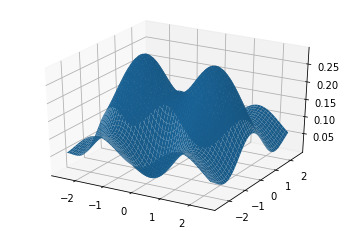

In [3]:
a = np.arange(-2.5, 2.5, 0.01)
b = np.arange(-2.5, 2.5, 0.01)

A, B = np.meshgrid(a, b)

zs = np.array(func_3d(A.ravel(), B.ravel()))
Z = zs.reshape(A.shape)

fig = plt.Figure()
ax = plt.axes(projection='3d')

ax.plot_surface(A, B, Z)
plt.show()

Well, as we can see, the graph now have peaks and valleys just as we had in our previous notebook, but they are now in 3d.
To visualize such a 3d plot, we use something known as `contour plots`. A `contour plot` is a graphical technique for representing a 3-dimensional surface by plotting constant `z` slices, called `contours`, on a 2-dimensional format. That is, given a value for `z`, lines are drawn for connecting the `(x,y)` coordinates where that `z` value occurs.

Let's see how our function look's on a contour plot.

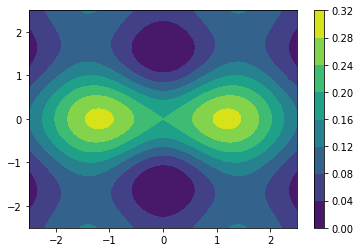

In [4]:
fig = plt.Figure()
ax = plt.axes()

cs = ax.contourf(A, B, Z)
plt.colorbar(cs)
plt.show()

That's a colorful plot. In the contour plot, bright colors represent peaks and dark color represents valleys. This can be observed very easily in above figure using the colormap on the right side of the plot.
Cotour plots really do make visualizing 3d plots easier.

## Gradient Decent
Ok, enough talks about plots, let's see what we need to implement gradient decent for our new 3d function. As now their are 2 independent variables, to calculate gradient of the function, we to find the `partial derivative` of the function with respect to each independent variables.
<br>
If you don't know how to take partial derivatives, the method is quite easy. To calculate partial derivative of a function with repect to a variable, just assume that all the other variables are constant and procede to derivate. For example, if you are derivating $z = f(x, y)$ with respect to $x$, assume all occurences of $y$ as constant and vice-versa.
<br>
In our case, the gradients will be,
$$
\frac {\partial z}{\partial x} = \frac {sin(2x).(x^2 + y^2 + 5) - 2x.(sin^2(x) + cos^2(y))} {(x^2 + y^2 + 5)^2}
$$
<br>
$$
\frac {\partial z}{\partial y} = \frac {-sin(2y).(x^2 + y^2 + 5) - 2y.(sin^2(x) + cos^2(y))} {(x^2 + y^2 + 5)^2}
$$
<br>
Well, those are some huge equations, you are welcome to reduce them in shorter form by using algebra. For this notebook, we are going to consider them in same form as mentioned.
Let's codify our gradient functions.

In [5]:
def func_drivative_x(x, y):
    num = np.sin(2 * x) * (x ** 2 + y ** 2 + 5) - 2 * x * (np.sin(x) ** 2 + np.cos(y) ** 2)
    den = (x ** 2 + y ** 2 + 5) ** 2
    return num / den

def func_drivative_y(x, y):
    num = - np.sin(2 * y) * (x ** 2 + y ** 2 + 5) - 2 * y * (np.sin(x) ** 2 + np.cos(y) ** 2)
    den = (x ** 2 + y ** 2 + 5) ** 2
    return num / den

Now, in the gradient decent function itself, we need to make changes to accomodate our new gradient functions. One point to note here is that, when we update/take a step towards optimum, all updates must be `simoultaneously` i.e. all gradient calculations are done before update and all updates take place at the same time.

Rest of the code is almost same.

In [6]:
def gradient_descent(start_x, start_y, learning_rate, epoch, main_func, gd_func_x, gd_func_y):
    '''
        Arguments:
        - start_x : 
            initial x position to start optimizing
        - start_y : 
            initial y position to start optimizing
        - learning_rate :
            Step size
        - epoch:
            Number of itrations to perform
        - main_func:
            function to optimize
        - gd_func_x:
            function which calculate the derivative of the original function w.r.t x
        - gd_func_y:
            function which calculate the derivative of the original function w.r.t y
    '''
    
    # Book Keeping gradient values
    x_gd = []
    y_gd = []
    z_gd = []
    
    x_gd.append(start_x)
    y_gd.append(start_y)
    z_gd.append(main_func(start_x, start_y))

    current_x = start_x
    current_y = start_y
    # begin the loops to update x and y
    for i in range(epoch):
        x_grad = gd_func_x(current_x, current_y)
        y_grad = gd_func_y(current_x, current_y)
        
        # Simoultaneous update
        next_x = current_x - learning_rate * (x_grad) #<- Update step
        next_y = current_y - learning_rate * (y_grad)
        
        x_gd.append(next_x)
        y_gd.append(next_y)
        z_gd.append(main_func(next_x, next_y))

        # update current_x
        current_x = next_x
        current_y = next_y

    return x_gd, y_gd, z_gd

Let's start optimizing.

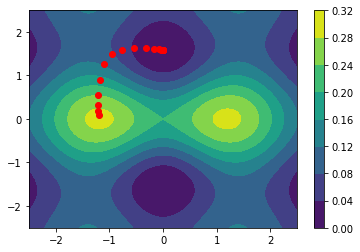

In [7]:
x0 = -1.2 # <- initial x
y0 = 0.1 # <- initial y
lr = 2 # <- learning rate
epoch = 20 # <- steps

# Running Gradient Decent
x_gd, y_gd, z_gd = gradient_descent(x0, y0, lr, epoch, func_3d, func_drivative_x, func_drivative_y)

# Plotting result
X, Y = np.meshgrid(x_gd, y_gd)
fig = plt.Figure()
ax = plt.axes()
cs = ax.contourf(A, B, Z)
ax.scatter(x_gd, y_gd, c='r')
plt.colorbar(cs)
plt.show()

As you can observe, out starting position is on one of the peaks, as we run Gradient Decent we start moving towards the minimum area. If you change the value of initial position and movement will also change and may result in landing of different local minimum.

## End Notes
In this notebook we understood how Gradient Decent works in more than dimensional space. In Machine Learning, we will see that mostly, the gradient calculation is much simpler as we will use vectorized implementation of function.

Until then ciao!